In [107]:
##Kaggle House Price Prediction Using PyTorch - Tabular Dataset

 - https://docs.fast.ai/tabular.html 
 - https://www.fast.ai/2018/04/29/categorical-embeddings/ 
 - https://www.fast.ai/2018/04/29/categorical-embeddings/ 
 - https://yashuseth.blog/2018/07/22
 pytorch-neural-network-for-tabular-data-with-categorical-embeddings/

In [1]:
import pandas as pd
import numpy as np
import torch

In [3]:
df = pd.read_csv("/content/drive/MyDrive/PyTorch/houseprice.csv", usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"])

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [6]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
LotShape         0
YearBuilt        0
1stFlrSF         0
2ndFlrSF         0
SalePrice        0
dtype: int64

In [7]:
df.shape

(1460, 10)

In [8]:
##We drop missing values from dataset 
df.dropna(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [10]:
for  i in df.columns:
  print("Column names :{} and unique values : {}".format(i, len(df[i].unique())))

Column names :MSSubClass and unique values : 15
Column names :MSZoning and unique values : 5
Column names :LotFrontage and unique values : 110
Column names :LotArea and unique values : 869
Column names :Street and unique values : 2
Column names :LotShape and unique values : 4
Column names :YearBuilt and unique values : 112
Column names :1stFlrSF and unique values : 678
Column names :2ndFlrSF and unique values : 368
Column names :SalePrice and unique values : 597


In [11]:
import datetime

In [12]:
datetime.datetime.now().year

2021

In [13]:
df['Total Years'] = datetime.datetime.now().year - df['YearBuilt']

In [14]:
df.drop("YearBuilt", axis = 1, inplace = True)

In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,18
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,45
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,20
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,106
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,21


In [16]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [17]:
cat_features = ['MSSubClass', 'MSZoning','Street', 'LotShape']
out_features = "SalePrice"

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
label_encoders['MSSubClass']  = LabelEncoder()
label_encoders['MSSubClass'].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0])

In [19]:
label_encoders

{'MSSubClass': LabelEncoder()}

In [20]:
for feature in cat_features:
  label_encoders[feature] = LabelEncoder()
  df[feature] = label_encoders[feature].fit_transform(df[feature])

In [21]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,18
1,0,3,80.0,9600,1,3,1262,0,181500,45
2,5,3,68.0,11250,1,0,920,866,223500,20
3,6,3,60.0,9550,1,0,961,756,140000,106
4,5,3,84.0,14260,1,0,1145,1053,250000,21


In [39]:
label_encoders

{'LotShape': LabelEncoder(),
 'MSSubClass': LabelEncoder(),
 'MSZoning': LabelEncoder(),
 'Street': LabelEncoder()}

In [40]:
#Now stacking and converting features into tensors
cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']], 1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [41]:
##Convert numpy into tensors
import torch
cat_features = torch.tensor(cat_features, dtype = torch.int64)

In [42]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [32]:
#create continuous features
conti_features = []
for i in df.columns:
  if i in ["MSSubClass", "MSZoning", "Street", "LotShape", "SalePrice"]:
    pass
  else:
    conti_features.append(i)

In [33]:
conti_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [43]:
#Stacking and create tensors of contiuous features
conti_values = np.stack([df[i].values for i in conti_features], axis = 1)
conti_values

array([[   65.,  8450.,   856.,   854.,    18.],
       [   80.,  9600.,  1262.,     0.,    45.],
       [   68., 11250.,   920.,   866.,    20.],
       ...,
       [   66.,  9042.,  1188.,  1152.,    80.],
       [   68.,  9717.,  1078.,     0.,    71.],
       [   75.,  9937.,  1256.,     0.,    56.]])

In [44]:
conti_values = torch.tensor(conti_values, dtype = torch.float)

In [45]:
conti_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [46]:
#Create dependent feature
y = torch.tensor(df["SalePrice"].values, dtype = torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [50]:
##Categorical , continuous and target features
cat_features.shape, conti_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [49]:
len(df['MSSubClass'].unique())

15

In [51]:
#Embedding Size for Categorical Features
cat_dims = [len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [52]:
cat_dims ##input dims for embedding layer

[15, 5, 2, 4]

In [56]:
#Thumb rule : Output dimension should be set based on the input dimension 
# (min(50, feature + 1 //2))
embedding_dim = [(x, min(50, (x + 1)// 2)) for x in cat_dims]

In [57]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [58]:
import torch 
import torch.nn as nn
import torch.nn.functional as func

In [59]:
embed_representation = nn.ModuleList([nn.Embedding(inp, out) for (inp, out) in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [60]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [62]:
#Taking only 4 records of catgorical features
cat_feat = cat_features[:4]
cat_feat

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [63]:
#Now we will convert embeded features into vector form
pd.set_option("display.max_rows", 500)

In [64]:
embedded_val = []
for i, e in enumerate(embed_representation):
  embedded_val.append(e(cat_features[:, i]))

In [65]:
embedded_val

[tensor([[-1.2928e+00, -6.0614e-01,  1.6319e-03,  ...,  1.7182e+00,
          -6.5434e-01,  1.6096e-01],
         [-1.5514e-01, -1.2203e+00,  1.4950e+00,  ...,  9.0881e-01,
           4.9549e-01,  4.3135e-01],
         [-1.2928e+00, -6.0614e-01,  1.6319e-03,  ...,  1.7182e+00,
          -6.5434e-01,  1.6096e-01],
         ...,
         [ 1.0298e+00, -1.3653e+00,  1.2635e+00,  ..., -5.6544e-02,
           1.1097e+00,  9.7960e-01],
         [-1.5514e-01, -1.2203e+00,  1.4950e+00,  ...,  9.0881e-01,
           4.9549e-01,  4.3135e-01],
         [-1.5514e-01, -1.2203e+00,  1.4950e+00,  ...,  9.0881e-01,
           4.9549e-01,  4.3135e-01]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.8777, -0.9589, -1.1663],
         [-0.8777, -0.9589, -1.1663],
         [-0.8777, -0.9589, -1.1663],
         ...,
         [-0.8777, -0.9589, -1.1663],
         [-0.8777, -0.9589, -1.1663],
         [-0.8777, -0.9589, -1.1663]], grad_fn=<EmbeddingBackward>),
 tensor([[0.0632],
         [0.0632],
         [0.06

In [68]:
z = torch.cat(embedded_val, 1)

In [69]:
z

tensor([[-1.2928e+00, -6.0614e-01,  1.6319e-03,  ...,  6.3227e-02,
          1.8107e+00,  7.7811e-01],
        [-1.5514e-01, -1.2203e+00,  1.4950e+00,  ...,  6.3227e-02,
          1.8107e+00,  7.7811e-01],
        [-1.2928e+00, -6.0614e-01,  1.6319e-03,  ...,  6.3227e-02,
          1.0483e+00,  2.2237e+00],
        ...,
        [ 1.0298e+00, -1.3653e+00,  1.2635e+00,  ...,  6.3227e-02,
          1.8107e+00,  7.7811e-01],
        [-1.5514e-01, -1.2203e+00,  1.4950e+00,  ...,  6.3227e-02,
          1.8107e+00,  7.7811e-01],
        [-1.5514e-01, -1.2203e+00,  1.4950e+00,  ...,  6.3227e-02,
          1.8107e+00,  7.7811e-01]], grad_fn=<CatBackward>)

In [71]:
#Note that :- All above embedding representation steps happening in the nn
##To prevent from overfittig we Implement dropout

dropout = nn.Dropout(.4)

In [72]:
final_dropout = dropout(z)
final_dropout

tensor([[-0.0000e+00, -0.0000e+00,  2.7199e-03,  ...,  1.0538e-01,
          0.0000e+00,  0.0000e+00],
        [-2.5856e-01, -2.0338e+00,  2.4916e+00,  ...,  1.0538e-01,
          3.0179e+00,  1.2968e+00],
        [-0.0000e+00, -1.0102e+00,  2.7199e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 0.0000e+00, -2.2755e+00,  2.1058e+00,  ...,  0.0000e+00,
          3.0179e+00,  1.2968e+00],
        [-2.5856e-01, -2.0338e+00,  2.4916e+00,  ...,  0.0000e+00,
          3.0179e+00,  0.0000e+00],
        [-2.5856e-01, -0.0000e+00,  2.4916e+00,  ...,  1.0538e-01,
          0.0000e+00,  0.0000e+00]], grad_fn=<MulBackward0>)

In [74]:
#Now create feed forward NN
import torch
import torch.nn as nn
import torch.nn.functional as func

class feedforwardNN(nn.Module):
  def __init__(self, embedding_dim, n_cont, out_sz, layers, p = 0.5):
    super().__init__()
    self.embeds = nn.ModuleList([nn.Embedding(inp, out) for inp, out in embedding_dim])
    self.emb_drop = nn.Dropout(p)
    self.bn_cont = nn.BatchNorm1d(n_cont)

    layerlist = []
    n_emb = sum((out for inp, out in embedding_dim))
    n_in = n_emb + n_cont #embedding value + continuous value
 
    for i in layers:
      layerlist.append(nn.Linear(n_in, i))
      layerlist.append(nn.ReLU(inplace = True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in = i
    
    layerlist.append(nn.Linear(layers[-1], out_sz))

    self.layers = nn.Sequential(*layerlist)

  def forward(self, x_cat, x_cont):
    embeddings = []
    for i, e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:, i]))
    
    x = torch.cat(embeddings, 1)
    x = self.emb_drop(x)

    x_cont = self.bn_cont(x_cont)
    x = torch.cat([x, x_cont], 1)
    x = self.layers(x)
    return x


In [75]:
len(conti_features)

5

In [76]:
torch.manual_seed(500)
model = feedforwardNN(embedding_dim, len(conti_features), 1, [100, 50], p = 0.4)

In [77]:
model

feedforwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [84]:
model.parameters

<bound method Module.parameters of feedforwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [82]:
##Define Loss and Optimizers
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [81]:
df.shape

(1201, 10)

In [85]:
conti_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [86]:
conti_values.shape

torch.Size([1201, 5])

In [90]:
##Train test split
batch_size = 1200
test_size = int(batch_size * 0.15)
train_categorical = cat_features[:batch_size - test_size]
test_categorical = cat_features[batch_size - test_size : batch_size]
train_cont = conti_values[: batch_size - test_size]
test_cont = conti_values[batch_size - test_size : batch_size]
y_train = y[: batch_size - test_size]
y_test = y[batch_size - test_size: batch_size]

In [91]:
len(train_categorical), len(test_categorical), len(train_cont), len(test_cont),len(y_train), len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [92]:
epochs = 5000
final_losses = []
for i in range(epochs):
  i = i + 1
  y_pred = model(train_categorical, train_cont)
  loss = torch.sqrt(loss_function(y_pred, y_train)) #RMSE
  final_losses.append(loss)
  if i % 10 == 1:
    print("Epoch number : {} and the loss : {}".format(i, loss.item()))
  optimizer.zero_grad() #reset optimizers 
  loss.backward() #backproparagation
  optimizer.step( )

Epoch number : 1 and the loss : 200496.796875
Epoch number : 11 and the loss : 200493.6875
Epoch number : 21 and the loss : 200489.359375
Epoch number : 31 and the loss : 200482.96875
Epoch number : 41 and the loss : 200473.640625
Epoch number : 51 and the loss : 200462.03125
Epoch number : 61 and the loss : 200447.859375
Epoch number : 71 and the loss : 200430.15625
Epoch number : 81 and the loss : 200407.703125
Epoch number : 91 and the loss : 200384.140625
Epoch number : 101 and the loss : 200356.453125
Epoch number : 111 and the loss : 200322.625
Epoch number : 121 and the loss : 200284.390625
Epoch number : 131 and the loss : 200249.421875
Epoch number : 141 and the loss : 200205.765625
Epoch number : 151 and the loss : 200161.734375
Epoch number : 161 and the loss : 200113.078125
Epoch number : 171 and the loss : 200063.0
Epoch number : 181 and the loss : 200005.34375
Epoch number : 191 and the loss : 199946.84375
Epoch number : 201 and the loss : 199887.5625
Epoch number : 211 a

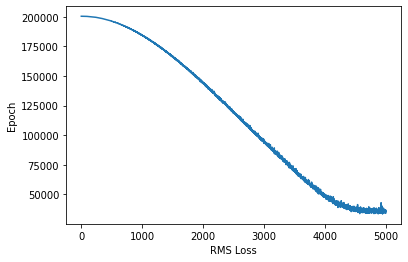

In [94]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), final_losses)
plt.xlabel("RMS Loss")
plt.ylabel("Epoch")
plt.show()

In [93]:
#Validate the test data
y_pred = ""
with torch.no_grad():
  y_pred = model(test_categorical, test_cont)
  loss = torch.sqrt(loss_function(y_pred, y_test))
print("RMSE : {}".format(loss))

RMSE : 37602.50390625


In [95]:
data_verify = pd.DataFrame(y_test.tolist(), columns= ['Test'])

In [96]:
data_predicted = pd.DataFrame(y_pred.tolist(), columns = ["Prediction"])

In [97]:
data_predicted

,Prediction
0,141675.656250
1,157816.359375
2,159726.578125
3,246705.687500
4,149961.187500
5,190181.375000
6,230027.390625
7,242289.640625
8,148771.046875
9,474094.687500


In [99]:
final_output = pd.concat([data_verify, data_predicted], axis = 1)
final_output['Difference'] = final_output['Test'] - final_output['Prediction']

In [101]:
final_output.head()

,Test,Prediction,Difference
0,130000.0,141675.656250,-11675.656250
1,138887.0,157816.359375,-18929.359375
2,175500.0,159726.578125,15773.421875
3,195000.0,246705.687500,-51705.687500
4,142500.0,149961.187500,-7461.187500


In [102]:
##Saving the model
torch.save(model, "/content/drive/MyDrive/PyTorch/HousePrice.pt")

In [103]:
torch.save(model.state_dict(), "/content/drive/MyDrive/PyTorch/HouseWeights.pt")

In [104]:
#Loading save the model
embeds_size = [(15, 8), (5, 3), (2, 1), (4,2)]
model_1 = feedforwardNN(embeds_size, 5, 1, [100, 50], p = 0.4)

In [105]:
model_1.load_state_dict(torch.load("/content/drive/MyDrive/PyTorch/HouseWeights.pt"))

<All keys matched successfully>

In [106]:
model_1.eval()

feedforwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)